In [1]:
from pipeline_functions import *

In [2]:
seed(0)

# PREPROCESSING

#### convertion pdbqt to sdf

# START

In [3]:
folder = "DATAS/"

In [4]:
pdb_uniprot = [f.split("/")[1].split("_")[0:2] for f in glob.glob(folder+"*.pdbqt")]

# CLASSIFICATION

P08172_3UON
number of antagonist:38
number of agonist:19
P28222_4IAR
number of antagonist:22
number of agonist:36
P11229_5CXV
number of antagonist:34
number of agonist:17
P08912_6OL9
number of antagonist:27
number of agonist:6
P30542_5UEN
number of antagonist:45
number of agonist:24
P29274_6MH8
number of antagonist:59
number of agonist:33
P41595_6DRZ
number of antagonist:51
number of agonist:34
P35462_3PBL
number of antagonist:33
number of agonist:16
P47900_4XNV
number of antagonist:19
number of agonist:4
P29274_4UHR
number of antagonist:59
number of agonist:33
P14416_6LUQ
number of antagonist:44
number of agonist:20
P28335_6BQH
number of antagonist:38
number of agonist:36
P14416_6CM4
number of antagonist:44
number of agonist:20
P08173_5DSG
number of antagonist:35
number of agonist:16
P20309_2CSA
number of antagonist:33
number of agonist:12
Q9H244_4PXZ
number of antagonist:10
number of agonist:4
P29274_2YDV
number of antagonist:59
number of agonist:33
P28223_6A93
number of antagonist:7

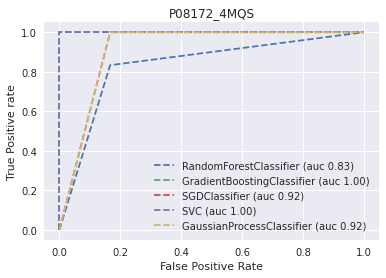

In [5]:
for pdb_id, uniprot_id in pdb_uniprot:
    print(uniprot_id + "_" + pdb_id)
    
    try:

        #preprocessing
        FEATURES, LABELS = preprocessing(uniprot_id, pdb_id)
        print("number of antagonist:" + str(sum(LABELS)))
        print("number of agonist:" + str(len(LABELS)-sum(LABELS)))
        em = ensemble_model()
        TRAIN, TRAIN_LABELS, TEST, TEST_LABELS = em.split_data_train_test(FEATURES, LABELS, ratio = 0.3)

        #fit models
        classifiers_normalized = em.model_fit_leaveOneOut(TRAIN, TRAIN_LABELS)

        #ensemble model core
        filtered_classifiers = em.filter_ensemble(classifiers_normalized)
        model_ensemble_with_cm = em.fit_ensemble(filtered_classifiers, TRAIN, TRAIN_LABELS)
        cm_ensemble = em.predict_ensemble(model_ensemble_with_cm, TEST, TEST_LABELS)

        #Save data
        save_model(model_ensemble_with_cm, uniprot_id, pdb_id)
        save_log(classifiers_normalized, uniprot_id, pdb_id)
        save_score(cm_ensemble, uniprot_id, pdb_id)
        save_roc(classifiers_normalized, TEST, TEST_LABELS, uniprot_id, pdb_id)
    except Exception as e:
        print(str(e))

### CHECK ligand promiscui

# TESTING

P08172_3UON antagonist:38 agonist:19
P08172_4MQS antagonist:38 agonist:19
P28222_4IAR antagonist:22 agonist:36
P28222_4IAQ antagonist:22 agonist:36
P11229_5CXV antagonist:34 agonist:17
P08912_6OL9 antagonist:27 agonist:6
P30542_5UEN antagonist:45 agonist:24
P14416_6LUQ antagonist:44 agonist:20
P14416_6CM4 antagonist:44 agonist:20
P29274_6MH8 antagonist:59 agonist:33
P29274_2YDV antagonist:59 agonist:33
P29274_4UHR antagonist:59 agonist:33
P41595_6DRZ antagonist:51 agonist:34
P35462_3PBL antagonist:33 agonist:16
P47900_4XNV antagonist:19 agonist:4
P28335_6BQH antagonist:38 agonist:36
P08173_5DSG antagonist:35 agonist:16
P20309_2CSA antagonist:33 agonist:12
Q9H244_4PXZ antagonist:10 agonist:4
P28223_6A93 antagonist:73 agonist:43
P35367_3RZE antagonist:65 agonist:15
P07550_3PDS antagonist:22 agonist:16

In [36]:
file_log = glob.glob("ROC/P07550_3PDS.log")
file_log

['ROC/P07550_3PDS.log']

In [37]:
df_log = pd.read_json(file_log[0])

In [39]:
df_log

,RandomForestClassifier,GradientBoostingClassifier,SGDClassifier,SVC,GaussianProcessClassifier
accuracy,0.73,0.700000,0.720000,0.855000,0.765000
balanced_accuracy,0.73,0.700723,0.725780,0.859348,0.766305
error_rate,0.27,0.300000,0.280000,0.145000,0.235000
f1_score,0.73,0.708738,0.695652,0.862559,0.756477
fn_rate,0.27,0.311321,0.238095,0.180180,0.215054
fp_rate,0.27,0.287234,0.310345,0.101124,0.252336
matthews_correlation,0.46,0.400722,0.445742,0.714335,0.531303
precision,0.73,0.730000,0.640000,0.910000,0.730000
sensitivity,0.73,0.688679,0.761905,0.819820,0.784946
tn_rate,0.73,0.712766,0.689655,0.898876,0.747664


In [40]:
file_json = glob.glob("ROC/P07550_3PDS*.json")

In [42]:
with open(file_json[0]) as f:
    data=json.load(f)
data

{'accuracy': 1.0,
 'balanced_accuracy': 1.0,
 'error_rate': 0.0,
 'f1_score': 1.0,
 'fn_rate': 0.0,
 'fp_rate': 0.0,
 'matthews_correlation': 1.0,
 'precision': 1.0,
 'sensitivity': 1.0,
 'tn_rate': 1.0}

In [52]:
df = pd.Series(data, name="metrics")
df

accuracy                1.0
balanced_accuracy       1.0
error_rate              0.0
f1_score                1.0
fn_rate                 0.0
fp_rate                 0.0
matthews_correlation    1.0
precision               1.0
sensitivity             1.0
tn_rate                 1.0
Name: metrics, dtype: float64

In [79]:
list(df_log.columns)

['RandomForestClassifier',
 'GradientBoostingClassifier',
 'SGDClassifier',
 'SVC',
 'GaussianProcessClassifier']

In [80]:
list(df_log.index)

['accuracy',
 'balanced_accuracy',
 'error_rate',
 'f1_score',
 'fn_rate',
 'fp_rate',
 'matthews_correlation',
 'precision',
 'sensitivity',
 'tn_rate']